<a href="https://colab.research.google.com/github/maryam-sabet/Google_Stockprice_LSTM/blob/main/Google_Stockprice_RNNLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
import keras
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# **Loading Data**

In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/RNN/GOOG.csv')
data_df = pd.DataFrame(data_df)
data_df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


# **Data Analysis**

In [ ]:
data_df.info()
#there is not missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [ ]:
# drop GOOG symbol
data_df = data_df.drop(['symbol'], axis=1)
data_df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [ ]:
# Splitting the date column to extract only the date part
data_df['date']= data_df['date'].str.split(" ", n = 1, expand = True)[0]
data_df['date']= pd.to_datetime(data_df['date'])
data_df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
close,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
high,1258.0,1.227431e+03,387.570872,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
low,1258.0,1.204176e+03,378.777094,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
open,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
volume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00
adjClose,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
adjHigh,1258.0,1.227431e+03,387.570873,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
adjLow,1258.0,1.204176e+03,378.777099,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
adjOpen,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
adjVolume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00


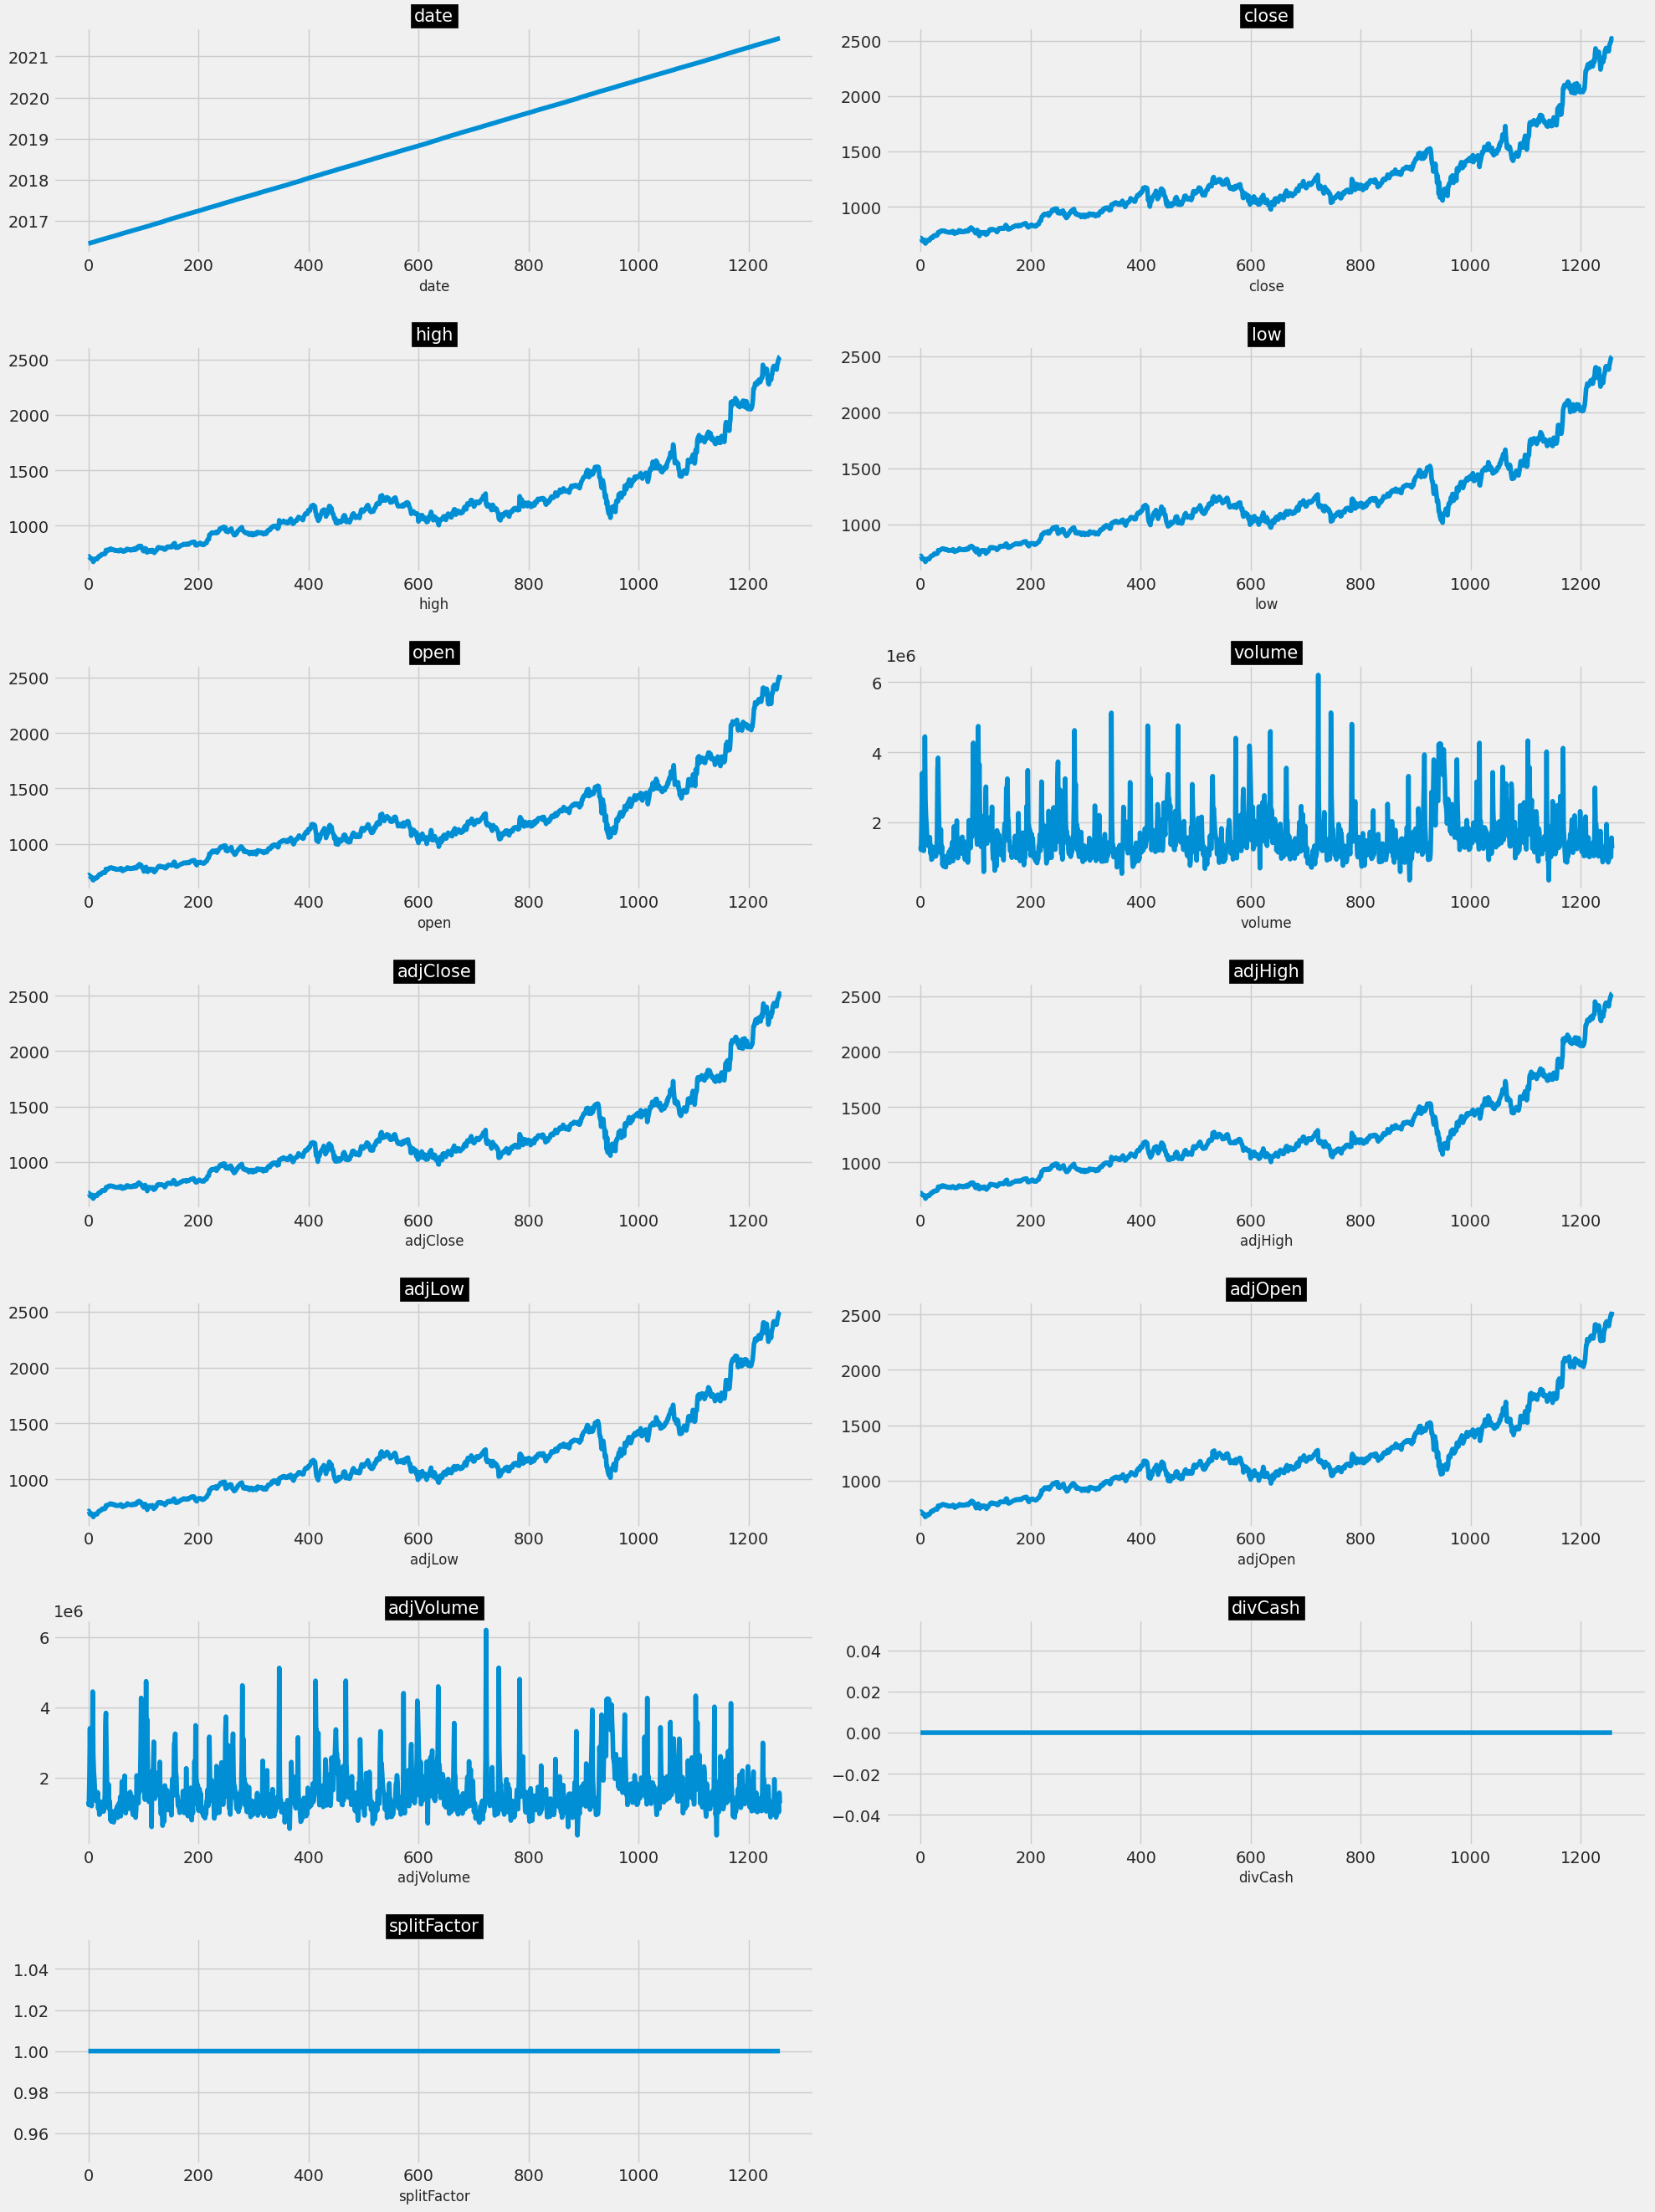

In [ ]:
plt.figure(figsize = (20,30))
for idx, i in enumerate(data_df):
    plt.subplot(8, 2, idx + 1)
    plt.plot(data_df.index.values,data_df[i])
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout(h_pad=2)
plt.show()

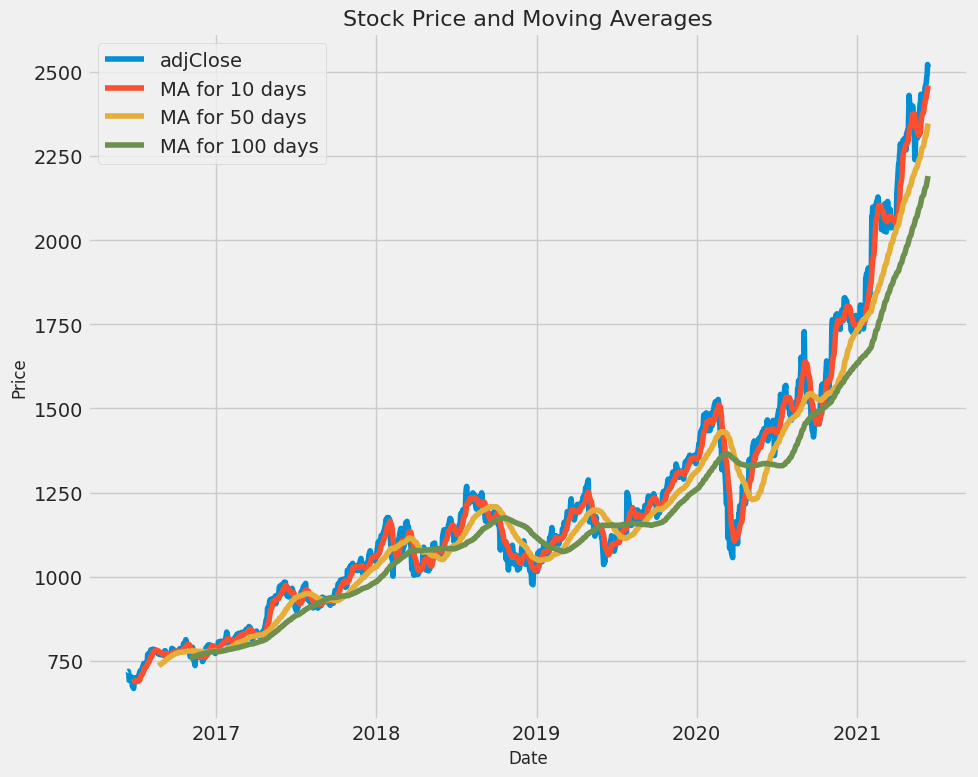

In [ ]:
ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data_df[column_name] = data_df['adjClose'].rolling(ma).mean()

plt.figure(figsize=(10, 8))

plt.plot(data_df['date'], data_df['adjClose'], label='adjClose')
plt.plot(data_df['date'], data_df['MA for 10 days'], label='MA for 10 days')
plt.plot(data_df['date'], data_df['MA for 50 days'], label='MA for 50 days')
plt.plot(data_df['date'], data_df['MA for 100 days'], label='MA for 100 days')

plt.title('Stock Price and Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


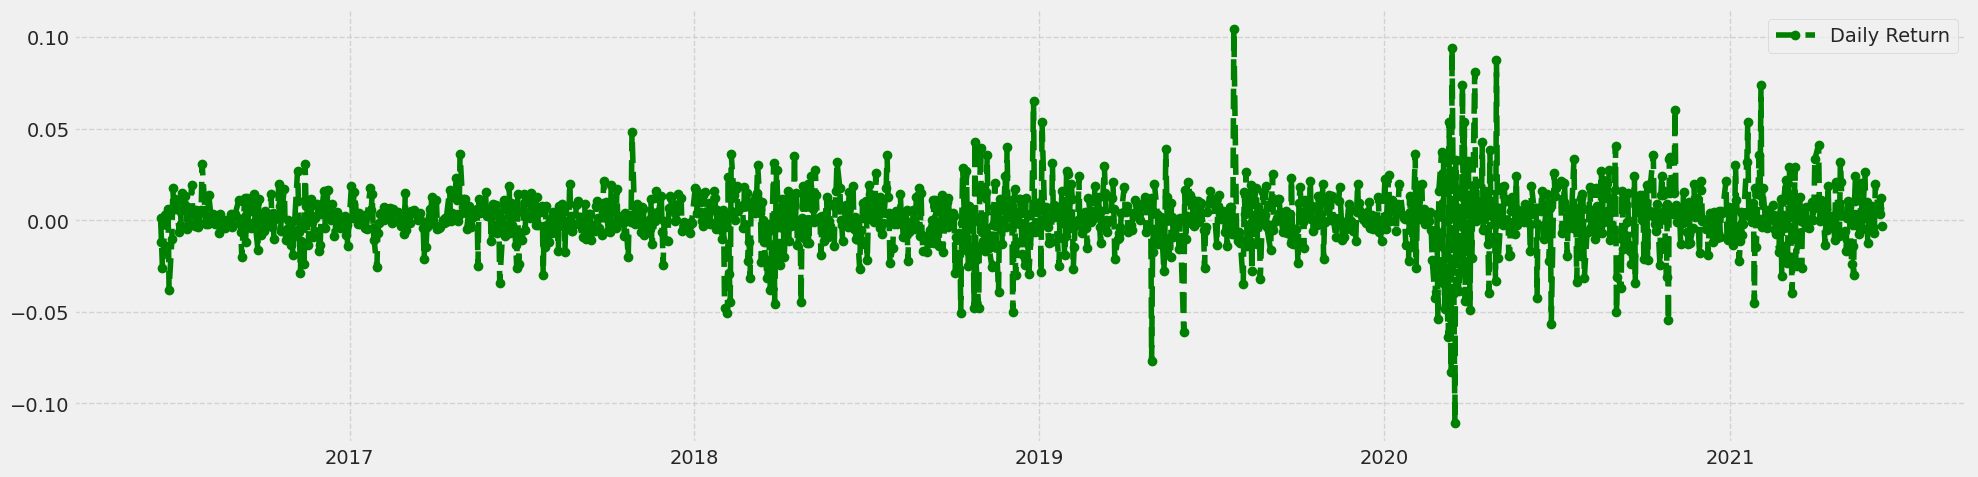

In [ ]:
# We'll use pct_change to find the percent change for each day
data_df['Daily Return'] = data_df['adjClose'].pct_change()

# Then we'll plot the daily return percentage
plt.figure(figsize=(20,5))

plt.plot(data_df['date'],data_df['Daily Return'],label='Daily Return',linestyle='--', marker='o',color='g')

plt.grid(True, linestyle='--', alpha=0.8)
plt.legend()
plt.tight_layout()
plt.show()

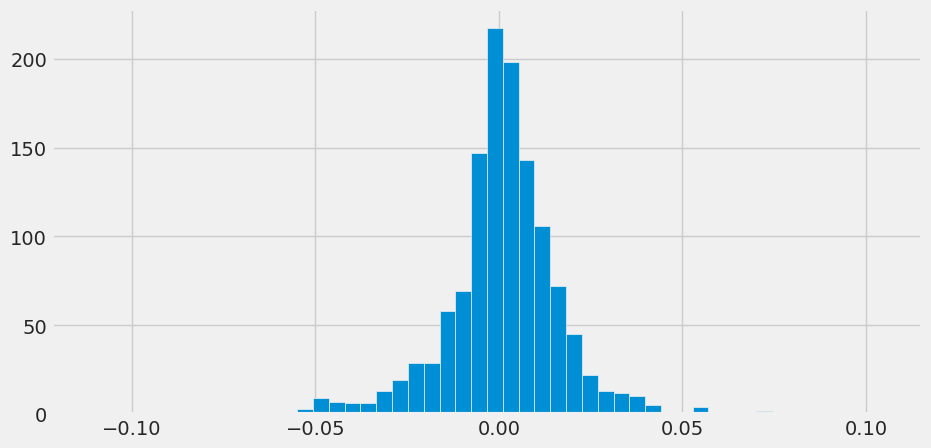

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data_df['Daily Return'],bins=50)
plt.show()

# **Modeling by LSTM**

In [ ]:
# Select 'adjClose' column to predict
data = data_df['close'].values.reshape(-1, 1)
print(data.shape)

(1258, 1)


In [ ]:
# scales the data to a specified range (between 0 and 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [ ]:
# Train Test Validation spilit
train_size = int(len(data_scaled) * 0.8)
validation_size = int(len(data_scaled) * 0.1)
test_size = len(data_scaled) - train_size - validation_size

train_data = data_scaled[:train_size]
validation_data = data_scaled[train_size:train_size + validation_size]
test_data = data_scaled[train_size + validation_size:]

print("Train data shape:", train_data.shape)
print("Validation data shape:", validation_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (1006, 1)
Validation data shape: (125, 1)
Test data shape: (127, 1)


In [ ]:
# Generate input and output data for the model
def create_dataset(data, look_back=1):
    X, Y = [], []
    # Loop through the data to create input-output pairs
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
# Number of previous days to use for prediction
look_back = 10
X_train, Y_train = create_dataset(train_data, look_back)
X_val , Y_val =  create_dataset(validation_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

In [ ]:
print("Train data shape:", X_train.shape, Y_train.shape)
print("Validation data shape:", X_val.shape , Y_val.shape )
print("Test data shape:", X_test.shape, Y_test.shape)

Train data shape: (996, 10) (996,)
Validation data shape: (115, 10) (115,)
Test data shape: (117, 10) (117,)


In [ ]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(units=50, input_shape=(look_back, 1)))
model.add(Dense(units=1))

optim = keras.optimizers.Adam(learning_rate = 0.0008)
model.compile(optimizer=optim, loss='mean_squared_error')


In [ ]:
H= model.fit(X_train, Y_train, epochs=100, batch_size=8, validation_data=(X_val , Y_val ) )


Epoch 1/100
125/125 [==============================] - 2s 8ms/step - loss: 0.0038 - val_loss: 8.3095e-04
Epoch 2/100
125/125 [==============================] - 1s 6ms/step - loss: 3.1625e-04 - val_loss: 8.3229e-04
Epoch 3/100
125/125 [==============================] - 1s 8ms/step - loss: 3.2976e-04 - val_loss: 7.9982e-04
Epoch 4/100
125/125 [==============================] - 1s 6ms/step - loss: 3.0000e-04 - val_loss: 7.3995e-04
Epoch 5/100
125/125 [==============================] - 1s 6ms/step - loss: 2.8461e-04 - val_loss: 7.1166e-04
Epoch 6/100
125/125 [==============================] - 1s 9ms/step - loss: 2.6720e-04 - val_loss: 6.9790e-04
Epoch 7/100
125/125 [==============================] - 1s 9ms/step - loss: 2.6201e-04 - val_loss: 6.8365e-04
Epoch 8/100
125/125 [==============================] - 1s 7ms/step - loss: 2.5371e-04 - val_loss: 6.3038e-04
Epoch 9/100
125/125 [==============================] - 1s 8ms/step - loss: 2.4582e-04 - val_loss: 7.0676e-04
Epoch 10/100
125/125 [=

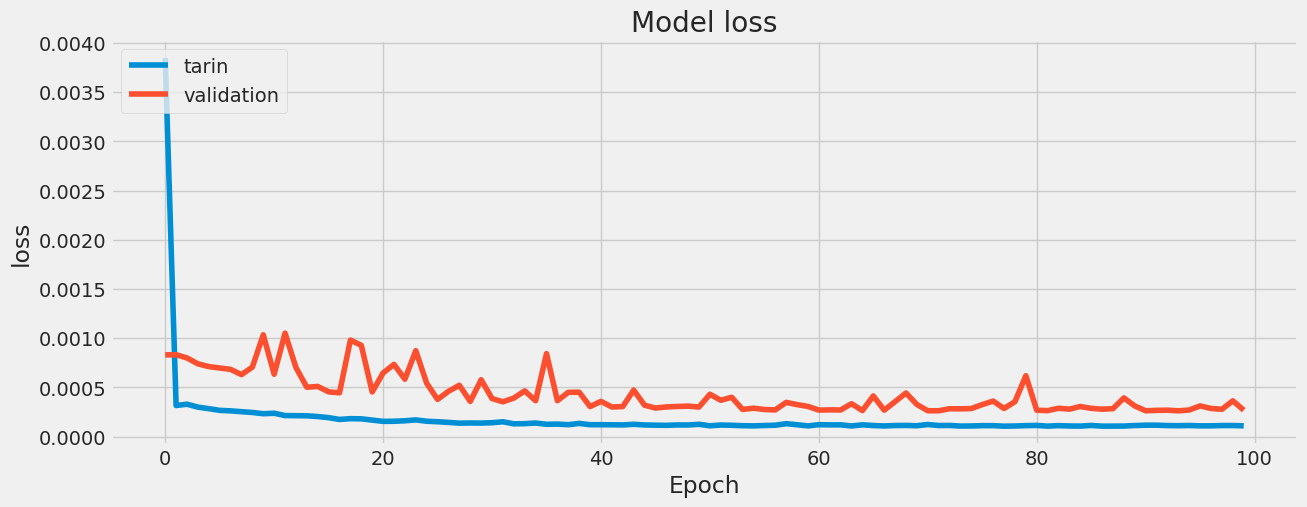

In [ ]:
#show result
plt.figure(figsize=(30,5))
plt.subplot(122)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(['tarin', "validation"] , loc="upper left")
plt.show()

4/4 [==============================] - 0s 4ms/step


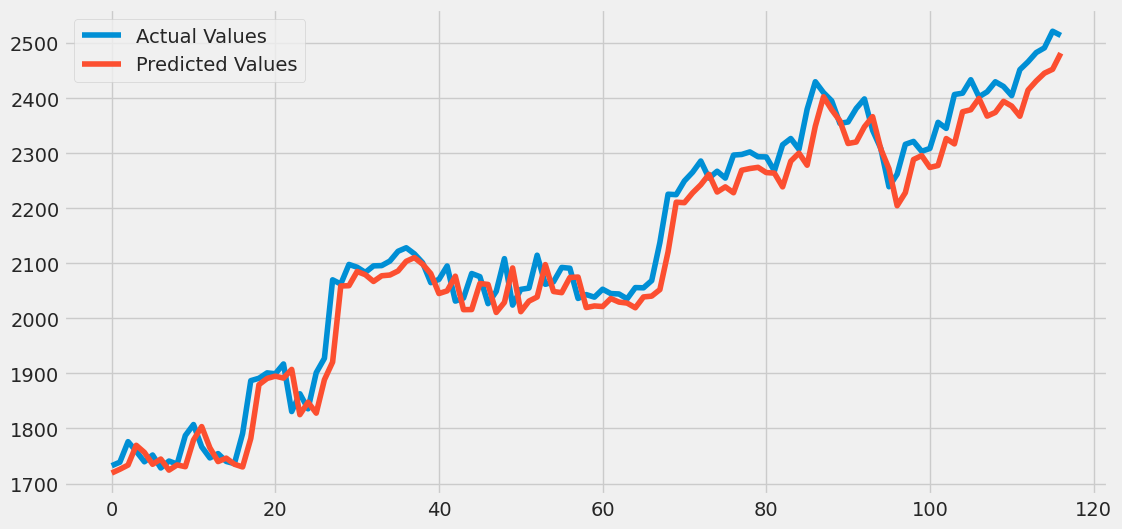

In [ ]:
# Get the models predicted price values
predicted_values = model.predict(X_test)

# Return the scale to original
predicted_values = scaler.inverse_transform(predicted_values)
Y_test_original = scaler.inverse_transform(Y_test.reshape(-1, 1))


plt.figure(figsize=(12, 6))
plt.plot(Y_test_original, label='Actual Values')
plt.plot(predicted_values, label='Predicted Values')
plt.legend()
plt.show()


# **Evaluation**

In [ ]:
r2Score_test = r2_score(Y_test_original, predicted_values)
print('test R2 Score: %.2f ' % (r2Score_test))

test R2 Score: 0.96 
